# A Comperative Analysis of Netflix Movies and TV Shows
## 1. Introduction
In this project, I am interested to analyze the two content types of Netflix. The data comes from TidyTuesday and consists of TV shows and Movies as of 2021, . This dataset includes information on netflix content type (TV show or Movie), director, cast, country, release year, duration, and description. First, I investigate what content type is more popular on Netflix by looking at their count, then I  look into the volume of their production overtime. After finding out the dominant content type, I determine what countries contribute the most to adding content on Netflix, and then I investigate the top Netflix content providing country in more detail. 

In [1]:
# Loading the necessary packages
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import tabulate as tb
import seaborn as sns
import itertools

In [2]:
# loading the csv directly from github
netflix=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv")

## 2. Exploring and Cleaning the Data
Before diving into visualizations, it is crucial to take a deep look at the data, and take data cleaning steps if 
necessary.

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


The following code prints the number of columns, rows, duplicates, and missing values. Out of 7787 observations, we have some missing values scattered around columns that should be taken care of. The most number of missing values come from the director column, followed by cast, country, date added, and rating.
I replace the NA values with the word "Unknown" for the director, cast, and country string variables that would later be used for further analysis. 

In [1]:
# There are 7787 movies / TV shows in the dataset
print('Number of Rows:', netflix.shape[0])
print('Number of Columns:', netflix.shape[1])

print('Number of Duplicates:', netflix.duplicated().any())

print('Missing Values:', netflix.isnull().values.sum())
print('\n')
# Most of the missing values is in the director, cast and country column
print('Missing rows in each column: \n')

# Create an empty list to store the loop output
output = []

for i in netflix.columns:
    NA_number = netflix[i].isnull().sum()
    NA_rate = NA_number / len(netflix) * 100
    if NA_rate > 0:
        # Append the column name and loop output to the list
        output.append([i, NA_number, f"{NA_rate:.2f}%"])

# Create a dataframe from the list
df = pd.DataFrame(output, columns=["Column", "Number of Missing", "Rate of Missing"])

# Print the dataframe
print(df.to_string(index=False))

# drop the 'Unnamed: 0' and 'Title'
df = df.drop(columns=['Unnamed: 0', 'Title'])


NameError: name 'netflix' is not defined

In [5]:
netflix['director']=netflix['director'].fillna('Unknown ')
netflix['cast']=netflix['cast'].fillna('Unknown')
netflix['country']=netflix['country'].fillna('Unknown')

## 3. Visualizations

### 3.1. Distribution
The following code produces a bar plot to display the count of Netflix Movies and TV shows to look into the distribution of Netflix content. It is clear that movies are more dominant on Netflix, and there are 2967 more movies than TV shows.

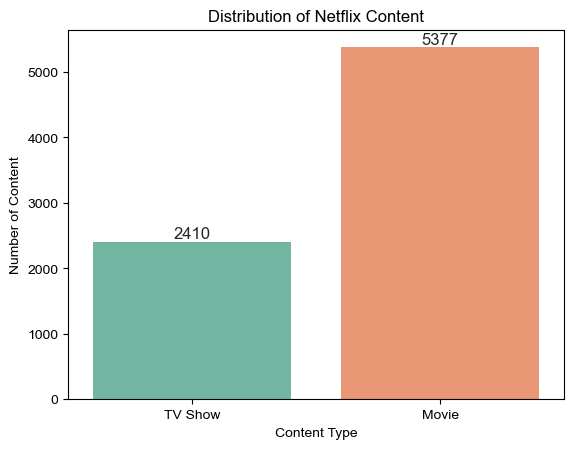

In [6]:
ax = sns.countplot(x="type", data=netflix, palette="Set2")
plt.xlabel('Content Type')
plt.ylabel('Number of Content')
plt.title('Distribution of Netflix Content')
sns.set(style="whitegrid", font_scale=1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height(),
            '{:d}'.format(int(p.get_height())),
            ha='center', va='bottom')

plt.show()


### 3.2. Production of Movies and TV Shows Over Time
The following plot looks into the production of the Netflix content over time, and it is apparent that starting from 1990s and 2000s, movies and TV shows have been producing at an increasing trend, and movie production have been the prior focus.

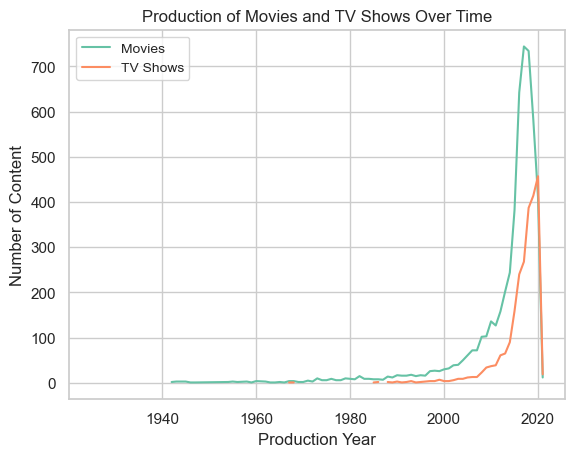

In [7]:
# Create a new DataFrame with the counts of movies and TV shows by year
counts = netflix.groupby(['release_year', 'type']).count()['show_id'].unstack()

# Create a line plot
plt.plot(counts.index, counts.Movie, label='Movies', color='#66c2a5')
plt.plot(counts.index, counts['TV Show'], label='TV Shows', color='#fc8d62')
plt.xlabel('Production Year')
plt.ylabel('Number of Content')
plt.title('Production of Movies and TV Shows Over Time')
plt.legend(fontsize=10)
plt.show()


### 3.3. Top 10 Countries With Most Number of Movies Produced
I concentrated more on movies because they make up the majority of Netflix content, filtered the data to just contain movies, and created a new data frame. Next I calculated the number of movies made in each country and ranked the top 10 countries by the number of movies produced. Following the United States, that has 1850 movies available on Netflix, are other countries like Canada, the United Kingdom, and India. The unknow bar includes all other movies where the country name was not listed.


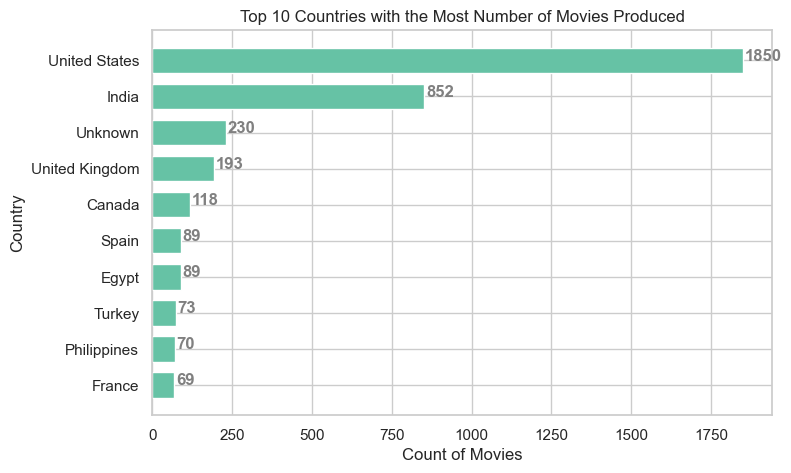

In [8]:
# Filtering the data to only include movies
Movies = netflix[netflix['type'] == 'Movie']

# Grouping the data by country, and counting the number of movies produced by each country
counts = Movies.groupby('country').count()['show_id']

# Finding the top 10 countries with the most number of movies produced
top_10 = counts.nlargest(10).sort_values()

# Creating a bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top_10.index, top_10.values, height=0.7, color=sns.color_palette('Set2')[0])

# Adding axis labels and a title
plt.xlabel('Count of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Number of Movies Produced')

# Adding the count of movies to the side of the bar plot
for i, v in enumerate(top_10 ):
    ax.text(v + 5, i, str(v), color='gray', fontweight='bold')

### 3.4. US MOVIES GENRES
Since the United States is the country that contributes the most to the Netflix content, I will now just concentrate on movies made in this country. Each row in the "listed in" column on the Netflix website contains a combination of the several genres that the movie falls under. I divide the genres into the following categories to improve the visual appearance of the graph, and I add a new column called "genre category" that will match on the first genre listed in the "listed in" column. After that, I removed any rows in which the genre category was absent from the list of categories.

In [9]:
# Defining the genre categories
genre_categories = ['Action & Adventure', 'Comedies', 'Documentaries', 'Dramas',
                    'Horror Movies', 'Independent Movies', 'International Movies',
                    'Music & Musicals', 'Romantic Movies', 'Sci-Fi & Fantasy',
                    'Sports Movies', 'Thrillers']
# Creatin a new data frame with only movies from the US
us_movies = Movies[Movies['country'] == 'United States']
us_movies.loc[:, 'genre_category'] = us_movies['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')][0] if any(g in x for g in genre_categories) else '')
# Filtering out rows where the genre category is not in the list of categories
us_movies = us_movies[us_movies['genre_category'].isin(genre_categories)]



/var/folders/7c/rfmjg5ms5xs9hy7mjmfx3vtm0000gn/T/ipykernel_17311/3733297923.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_movies.loc[:, 'genre_category'] = us_movies['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')][0] if any(g in x for g in genre_categories) else '')


In [10]:
us_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre_category
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Action & Adventure
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Dramas
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,Dramas
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,Dramas
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,Independent Movies


I then plotted the subplots, with the first one generating a count of movies in each genre group through time, with the y-axis denoting the total number of movies and the x-axis representing the year of release. Each bar in the second plot represents a different movie genre and provides a quantity for each genre type. The plots demonstrate that Netflix's documentaries genre predominates over its dramas, comedies, action and adventure, and other genres. Surprisingly, Romantic movies and Fantasy are displayed with the least numbers, this is because I previously created the new column that   matches on the first genre listed in the "listed in" column. Thus, certain movies may also be listed under the Dramas or Action and Adventure categories, and the filter tries to avoid that overlap, this why these genres are listed with least number.

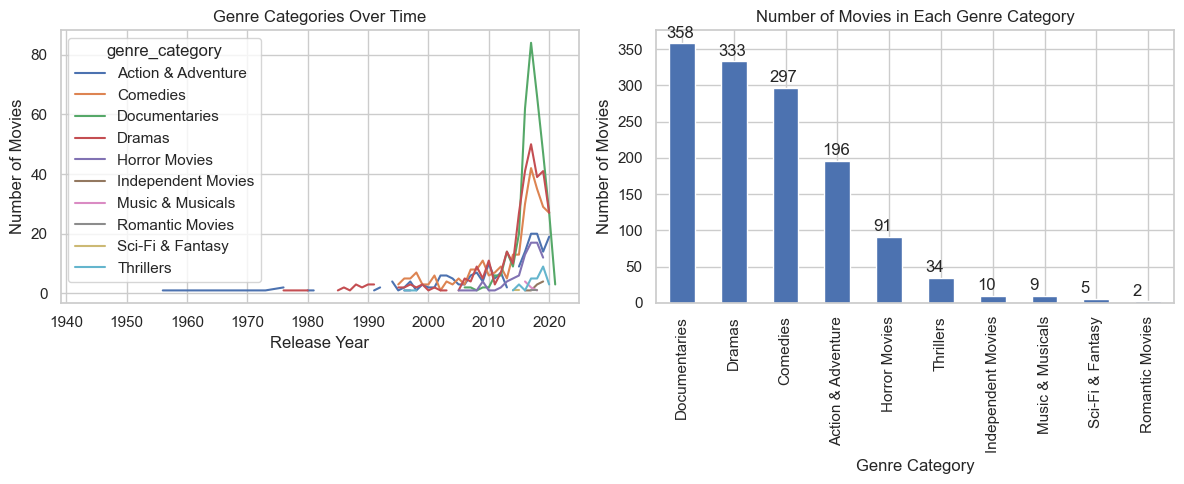

In [11]:
# Creating the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting genre categories over time
us_movies.groupby(['genre_category', 'release_year']).size().unstack('genre_category').plot(ax=axs[0])
axs[0].set_xlabel('Release Year')
axs[0].set_ylabel('Number of Movies')
axs[0].set_title('Genre Categories Over Time')

# Plot count of movies in each genre category
counts = us_movies['genre_category'].value_counts()
counts.plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Genre Category')
axs[1].set_ylabel('Number of Movies')
axs[1].set_title('Number of Movies in Each Genre Category')

# Adding count of movies on top of the bars
for i, v in enumerate(counts):
    axs[1].text(i - 0.3, v + 8, str(v))

plt.tight_layout()
plt.show()


### 3.5. Network of Top 3 US Movie Directors
In the last part, I am taking one genre category "Action and Adventure", and plotting a network of top 3 directors with all the actors they worked with over the years. It creates a network where the yellow nodes represent the top 3 directors and the red ones actors. Then these nodes are connected by edges everytime these directors and actors worked together in a movie.

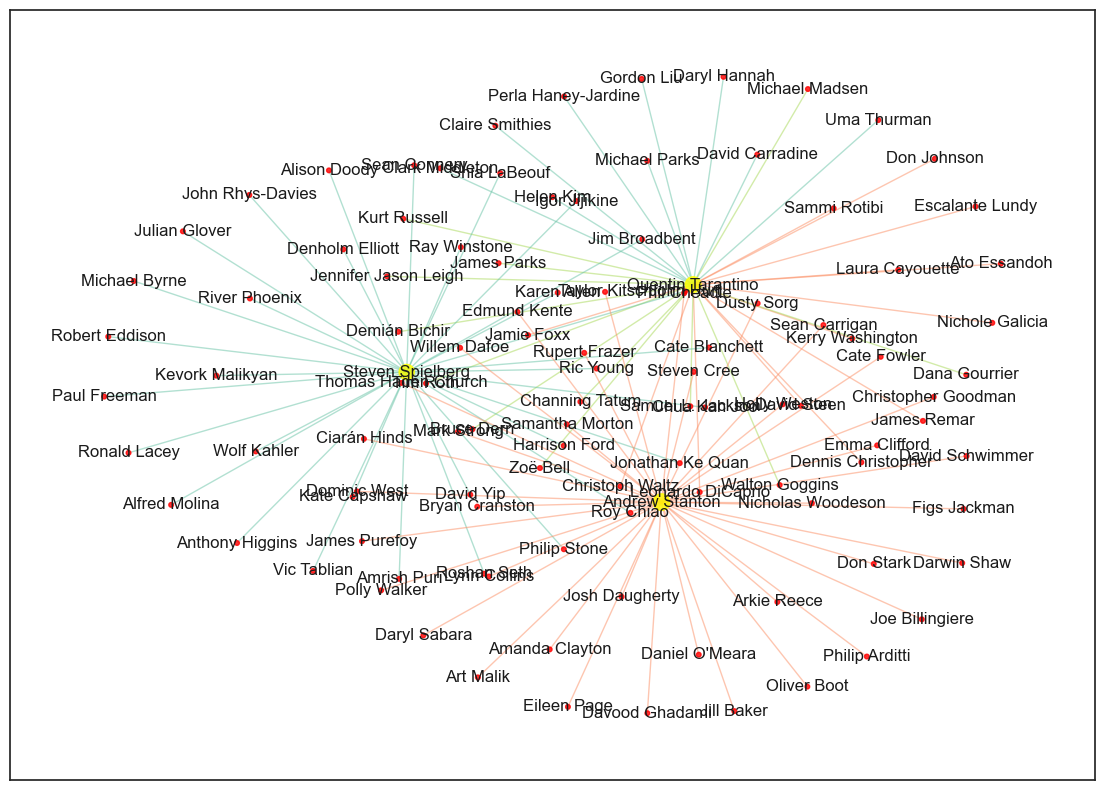

In [12]:
# Defining the genre categories
genre_categories = ['Action & Adventure']

# Extracting the first genre category from the 'listed_in' column
us_movies['genre_category'] = us_movies['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')][0] if any(g in x for g in genre_categories) else None)

# Filtering out any movies not in the genre categories
us_movies = us_movies[us_movies['genre_category'].isin(genre_categories)]

# Getting a list of all directors and actors who worked together in the same movie
movies = us_movies['title']
directors = []
actors = []
for movie in movies:
    directors_ = us_movies[us_movies['title'] == movie]['director'].tolist()
    actors_ = [a.strip() for a in us_movies[us_movies['title'] == movie]['cast'].tolist()[0].split(',')]
    for pair in itertools.product(directors_, actors_):
        directors.append(pair[0])
        actors.append(pair[1])

# Limiting the number of directors to top 3
director_counts = {director: directors.count(director) for director in set(directors)}
top_3_directors = sorted(director_counts, key=director_counts.get, reverse=True)[:3]
actors = [actor for i, actor in enumerate(actors) if directors[i] in top_3_directors]
directors = [director for director in directors if director in top_3_directors]

# Creating the network
G = nx.Graph()
for i in range(len(directors)):
    for j in range(len(actors)):
        if directors[i] != actors[j]:
            # Checking if the director and actor worked together
            movies_ = us_movies[(us_movies['director'] == directors[i]) & (us_movies['cast'].str.contains(actors[j]))]['title'].tolist()
            if len(movies_) > 0:
                # Adding the nodes for the director and actor
                if not G.has_node(directors[i]):
                    G.add_node(directors[i], label='director')
                if not G.has_node(actors[j]):
                    G.add_node(actors[j], label='actor')
                # Adding the edge between the director and actor
                for movie in movies_:
                    G.add_edge(directors[i], actors[j], movie=movie)

# Setting node size proportional to degree centrality
degree_c = nx.degree_centrality(G)
node_size = [v * 1200 if G.nodes[n]['label'] == 'actor' else v * 400 for n, v in degree_c.items()]


# Setting the node color based on node type
node_color = ['red' if G.nodes[n]['label'] == 'actor' else 'yellow' for n in G.nodes()]

# Setting the edge color based on movie release year
edge_color = [us_movies[us_movies['title'] == G.edges[e]['movie']]['release_year'].tolist()[0] for e in G.edges()]
edge_cmap = plt.cm.get_cmap('Set2')
edge_colors = edge_cmap([((year - 2010) / 10) for year in edge_color])

pos = nx.kamada_kawai_layout(G)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.show()


## 4. Conclusion
To sum up, I found that movies are more dominant category on Netflix with the US producing the most movies overall. Action and adventure movies, dramas, thrillers, and documentaries are the most popular movie genres in the US. Since I have a keen interest in action and adventure movies,  I looked more into this genre, and plotted a network of top 3 directors with the actors they worked together in a movie. It should come as no surprise that Quentin Terantino, Steven Spielberg, and Andrew Stanton are the top 3 filmmakers in this genre.
